In [17]:
import numpy as np
import tensorflow as tf
from timeit import default_timer as timer
import math
from ae_data import *

np.random.seed(314)
tf.set_random_seed(272)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


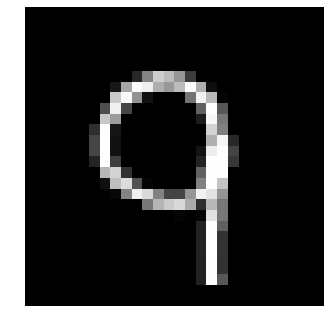

In [18]:
data_train, data_val, data_test, y_train, y_val, y_test, dataDim = \
    mnist_import(numTrain=50000, is_visualize=True,\
                range_normalize=[-1.0,1.0], is_one_hot=False)

In [20]:
import ae_class as my_AE

%load_ext autoreload
%autoreload 2


X_train = np.array(data_train, copy=True)
X_val = np.array(data_val, copy=True)
X_test = np.array(data_test, copy=True)

    
layersNum = 100
NN_architecture = dict(
    dims = np.insert(np.round(400*np.ones(layersNum)).astype(np.int32), 0, dataDim),
    W_init_var = 1.05,
    b_init_var = 2.01e-5,
    v_init_var = 0.0,
    transfer_func_encoder = tf.tanh,  # this is sigma
    transfer_func_decoder = tf.tanh,  # this is phi
    transfer_func_output = tf.tanh,   # can be None for identity
    transfer_func_mid = 'default',    # if 'default', same as transfer_func_encoder
    dropOut = None,                   # can be None
    loss_choice = 'NMSE',             # MSE, NMSE, cross entropy
    is_use_batchnorm = False,
    is_train_decoder_bias = True,
    GPU_which = 0,                 # can be None
    GPU_memory_fraction = 0.95,
    Tensorflow_randomSeed = 272
)
nn = my_AE.AEbuild(NN_architecture)

maxIter = int(1e5)
display_iters = np.array([1, 5, *np.arange(10,100,5), *np.arange(100,1000,20), \
                                *np.arange(1e3,1e4,2e2), *np.arange(1e4,1e5,2e3), \
                                *np.arange(1e5,1e6,2e4), *np.arange(1e6,1e7,2e5), \
                                *np.arange(1e7,1e8,2e6), 1e8]).astype(int)
display_iters = display_iters[display_iters<=maxIter]

nn, train_loss_saved, val_loss_saved, test_loss_saved = \
    my_AE.AEtrain(nn, X_train, X_val, X_test, learning_rate=5e-3, lr_decay_rate=1.0, l2reg=0.0, 
            maxIter=maxIter, batch_size=125,  preIter=0, prebatch_size=1000,\
            display_iters=display_iters, \
            is_verbose=True, is_save_model=False, model_path=None,
            save_model_iters = [])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Iter | Time (min) | Learning rate | Train Rec Loss | Val Rec Loss | Test Rec Loss
00000001 | 0.15 | 5.00e-03 | 9.947e-01 | 9.947e-01 | 9.946e-01
00000005 | 0.06 | 5.00e-03 | 9.795e-01 | 9.795e-01 | 9.793e-01
00000010 | 0.07 | 5.00e-03 | 9.699e-01 | 9.699e-01 | 9.697e-01
00000015 | 0.07 | 5.00e-03 | 9.631e-01 | 9.630e-01 | 9.629e-01
00000020 | 0.07 | 5.00e-03 | 9.571e-01 | 9.571e-01 | 9.570e-01
00000025 | 0.07 | 5.00e-03 | 9.515e-01 | 9.514e-01 | 9.514e-01
00000030 | 0.07 | 5.00e-03 | 9.461e-01 | 9.460e-01 | 9.460e-01
00000035 | 0.07 | 5.00e-03 | 9.408e-01 | 9.407e-01 | 9.407e-01
00000040 | 0.07 | 5.00e-03 | 9.356e-01 | 9.355e-01 | 9.355e-01
00000045 | 0.07 | 5.00e-03 | 9.303e-01 | 9.303e-01 | 9.302e-01
00000050 | 0.07 | 5.00e-03 | 9.251e-01 | 9.250e-01 | 9.250e-01
00000055 | 0.07 | 5.00e-03 | 9.199e-01 | 9.198e-01 | 9.198e-01
00000060 | 0.07 | 5.00e-03 | 9.146e-01 | 9.145e-01 | 9.145e-01
00000065 | 

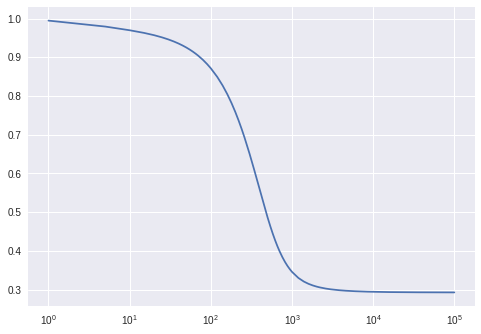

In [21]:
import matplotlib.pyplot as plt

plt.semilogx(display_iters, test_loss_saved)
plt.show()